In [ ]:
#from pgrim.bayesnet import BayesNet, show_nets
from causal_discovery_functions import *
import pandas as pd

from castle.common.priori_knowledge import PrioriKnowledge
from causal_discovery_functions import plot_dags, show_nets
from algorithms import PC, GES

%matplotlib inline

2025-04-20 00:24:21,241 - /Users/dennisfj/Michigan/bayes-nets/.venv/lib/python3.12/site-packages/castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2025-04-20 00:24:21,333 - /Users/dennisfj/Michigan/bayes-nets/.venv/lib/python3.12/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


## Simulate Training Data

In [2]:
method = 'linear'
sem_type = 'gauss'
n_nodes = 10
n_edges = 15
n = 2000

In [3]:
true_dag, X = simulate_iid(method, sem_type, n_nodes, n_edges, n)
X

2025-04-20 00:24:21,354 - /Users/dennisfj/Michigan/bayes-nets/.venv/lib/python3.12/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


array([[  1.588,  -1.406,   2.839, ...,  -0.505,   3.853, -17.206],
       [ -3.157,   1.809,  -2.551, ...,   1.828,  -1.4  ,   2.331],
       [  1.884,   0.823,   1.644, ...,  -1.086,  -2.13 ,  15.415],
       ...,
       [ -0.716,  -2.291,  -1.471, ...,   0.692,   2.593, -14.45 ],
       [  0.638,   0.615,  -0.671, ...,  -0.215,  -0.342,   1.048],
       [ -0.931,   0.728,   0.451, ...,  -0.354,   0.606,   0.991]],
      shape=(2000, 10))

In [4]:

#priori = PrioriKnowledge(X.shape[1])
#priori.add_required_edges([(3, 9),
                           #(4, 9),
                           #(5, 9),
                           #(8, 5),
                           #(4, 3)])
#priori.add_forbidden_edges([(8, 1),
                            #(9, 5)])

node_labels = list(letters[:n_nodes])

X = pd.DataFrame(X, columns=node_labels)

pc1 = PC(variant='original', priori_knowledge=None)
pc1.learn(X, ground_truth=true_dag)

ges1 = GES(criterion='bic')
ges1.learn(X, ground_truth=true_dag)


print("***\nPC1: no priori knowledge\n***")
met = MetricsDAG(pc1.causal_matrix, true_dag)
print(met.metrics)

print("***\nGES1: no priori knowledge\n***")
met = MetricsDAG(ges1.causal_matrix, true_dag)
print(met.metrics)


SEP_SET:
{(A, B): [], (A, G): [], (A, I): [], (B, C): [], (B, D): [], (B, E): [], (B, H): [], (C, G): [], (C, I): [], (D, G): [], (D, I): [], (E, G): [], (E, I): [], (G, H): [], (H, I): [], (A, D): [np.intGE(H)], (A, E): [np.intGE(H)], (A, H): [np.intGE(C)], (B, J): [np.intGE(I)], (C, D): [np.intGE(H)], (C, E): [np.intGE(H)], (C, F): [np.intGE(A)], (D, F): [np.intGE(H)], (E, F): [np.intGE(H)], (E, J): [np.intGE(D)], (F, G): [np.intGE(B)], (G, I): [np.intGE(B)], (G, J): [np.intGE(B)], (H, J): [np.intGE(E)], (C, J): [np.intGE(A), np.intGE(H)], (F, I): [np.intGE(B), np.intGE(J)]}
***
PC1: no priori knowledge
***
{'fdr': 0.1111, 'tpr': 0.8889, 'fpr': 0.0741, 'shd': 6, 'nnz': 18, 'precision': np.float64(0.6667), 'recall': np.float64(0.6667), 'F1': np.float64(0.6667), 'gscore': np.float64(0.3333)}
***
GES1: no priori knowledge
***
{'fdr': 0.1852, 'tpr': 1.2222, 'fpr': 0.1852, 'shd': 6, 'nnz': 27, 'precision': np.float64(0.5926), 'recall': np.float64(0.8889), 'F1': np.float64(0.7111), 'gscore

## Visualize Causal Discovery Algorithms

In [7]:
progress_frames_to_gif(pc1.progress_frames, node_labels=node_labels, name="pc", frame_duration=400)
progress_frames_to_gif(ges1.progress_frames, node_labels=node_labels, name="ges")

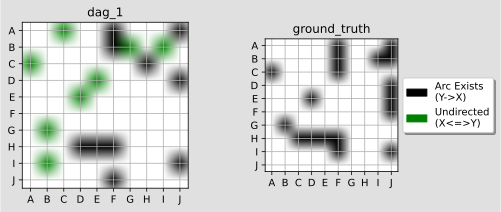

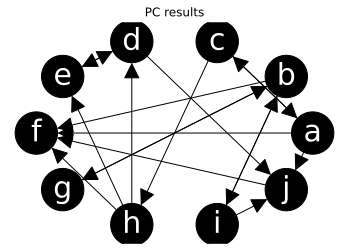

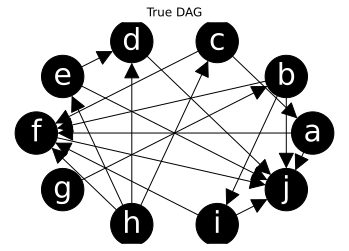

In [ ]:
plot_dags([pc1.causal_matrix, true_dag], highlight_undirected=True)
show_nets([pc1.causal_matrix, true_dag])
show_nets_circular(pc1.causal_matrix, node_labels=node_labels, graph_label="PC results")
show_nets_circular(true_dag, node_labels=node_labels, graph_label="True DAG")